In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
combine = [train_df, test_df]

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 훈련 자료 object 변수 통계치

#위에 info에서 object변수들의 통계치를 살핀 것이다.
train_df.describe(include=['O'])

#557명 (top의 SEX = male, freq의 SEX = 577)

#훈련 자료 가장 많은 승선지 : S, 644명 

#티켓값은 뭐 죄다 다르네...

#Cabin은...

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gillespie, Mr. William Henry",male,347082,G6,S
freq,1,577,7,4,644


# Pclass

In [14]:
#객실 등급(P-class)에 따른 생존률 비교
train_df[['Pclass', 'Survived']].groupby(['Pclass'],
                                         as_index=False).mean().sort_values(by='Survived', ascending=False)
# groupby에 as_index를 False로 하면 Pclass를 index로 사용하지 않는다.
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용한다

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass에 따른 상관관계는 corr을 보이는건가?

# SEX

In [15]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# SibSp

In [16]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Parch

In [17]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


동행이 적을수록 생존율이 높더라

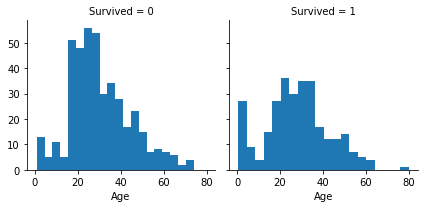

In [18]:
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

30~50의 사망율이 엄청나게 높구나 ;;

시각화 잘해놨네!  
  
  
나도 좀 배워놔야겠다

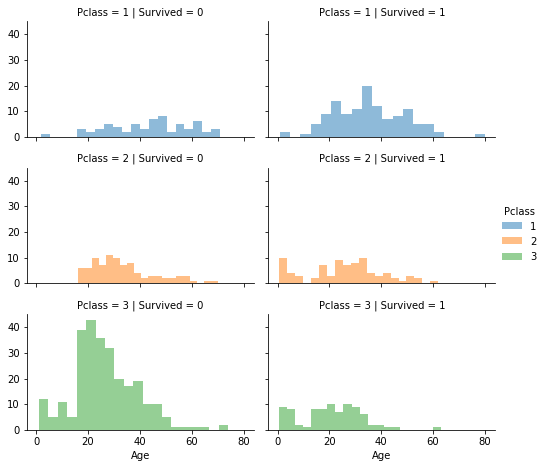

In [19]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

3등급 승객들 중 40대 이하는 다 개죽음당했구만 ;;

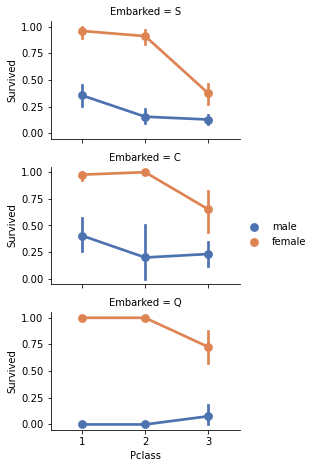

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

grid.add_legend()

승선지가 C와 Q인 경우, 남성의 티켓 등급이 3등급일 때 2등급보다 생존율이 높을 가능성이 존재  

즉, 승선지도 중요한 Feature가 된다는 뜻이다

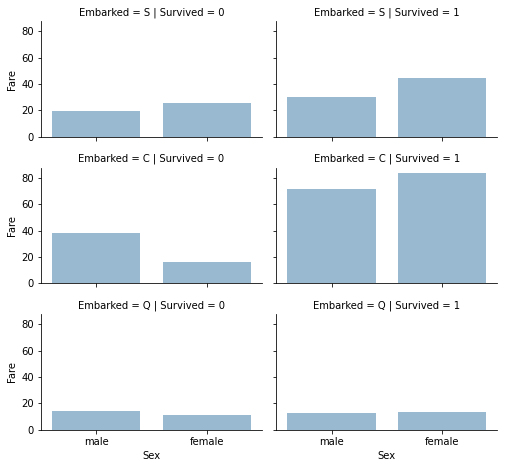

In [21]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()

In [24]:
print("Before:", train_df.shape, test_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
print("After:", train_df.shape, test_df.shape)

Before: (891, 12) (418, 11)
After: (891, 10) (418, 9)


In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [28]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


즉, 성씨나 이름 앞에 붙는것도 중요한 지표가 된다

# Title 변수를 숫자형 변수로 바꿔준다

In [29]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [31]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [33]:
train_df = train_df.drop(['Name',"PassengerId"], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

# 성별 변수를 숫자 범주형 변수로 바꿔준다

In [34]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female':1, 'male':0} ).astype(int)

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


# Pclass와 성별의 시각화

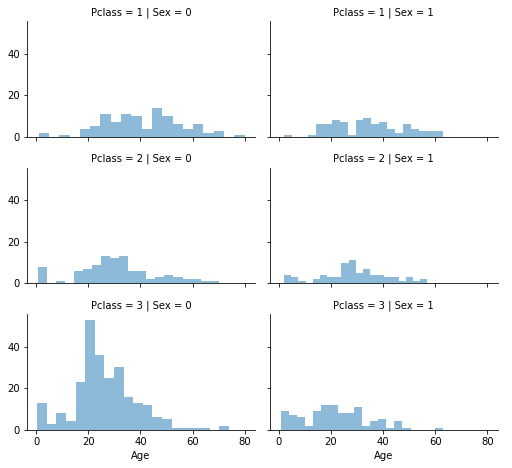

In [37]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height= 2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# AGE의 결측치 채우기

In [40]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            #위에서 guess_ages 사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따른다
            
            age_guess = guess_df.median()
            
            #age의 random값이 소수점을 .5에 가깝도록 변형한다
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i, j]
            
    dataset['Age'] = dataset['Age'].astype(int)

In [41]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

# 연령 변수를 범주형 변수로 바꿔준다

In [42]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
#임의로 5개 그룹을 지정한다
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [44]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']

In [45]:
train_df = train_df.drop(['AgeBand'], axis=1)

In [46]:
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


SibSp와 Parch를 가족과의 동반여부를 알 수 있는 새 변수로 통합

In [47]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [48]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [50]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [51]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [52]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [54]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis= 1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [55]:
for dataset in combine:
    dataset['Age * Class'] = dataset.Age * dataset.Pclass

In [56]:
train_df.loc[:, ['Age * Class', 'Age', 'Pclass']].head(10)

,Age * Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [57]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [58]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [59]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## 승선지 변수를 범주형 변수로 변경

In [60]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)

In [61]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age * Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [62]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age * Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Fare를 숫자 범주형 변수로 바꿔주

In [63]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [64]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] <= 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2    
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [65]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age * Class
0,0,3,0,1,2,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,2,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,2,0,1,1,6
5,0,3,0,1,2,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,21,0,4,0,0
8,1,3,1,1,2,0,3,0,3
9,1,2,1,0,30,1,3,0,0


In [66]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age * Class
0,892,3,0,2,2,2,1,1,6
1,893,3,1,2,2,0,3,0,6
2,894,2,0,3,2,2,1,1,6
3,895,3,0,1,2,0,1,1,3
4,896,3,1,1,2,0,3,0,3
5,897,3,0,0,2,0,1,1,0
6,898,3,1,1,2,2,2,1,3
7,899,2,0,1,29,0,1,0,2
8,900,3,1,1,2,1,3,1,3
9,901,3,0,1,24,0,1,0,3


In [68]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [72]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,2.198784
5,Title,0.396063
2,Age,0.279272
4,Embarked,0.272223
6,IsAlone,0.211411
3,Fare,-0.002291
7,Age * Class,-0.303744
0,Pclass,-0.700441


####  생존 여부 예측에 영향력이 큰 변수는 성별

# SVM 중 SVC

In [81]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.68

# KNN

In [82]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.97

# Gaussian Naive Bayes

In [83]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)* 100 , 2)
acc_gaussian

72.62

# Perceptron

In [84]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100 , 2)
acc_perceptron

74.41

# Linear SVC

In [85]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100 , 2)
acc_linear_svc

78.0

# Stochastic Gradient Descent

In [86]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.96

# Decision Tree

In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.11

# Random Forest

In [88]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

In [89]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.11
8,Decision Tree,89.11
1,KNN,85.97
2,Logistic Regression,80.36
0,Support Vector Machines,78.68
7,Linear SVC,78.00
5,Perceptron,74.41
6,Stochastic Gradient Decent,73.96
4,Naive Bayes,72.62


In [90]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [91]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
